# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("data/customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [4]:
#check for unique values in order to map them
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [5]:
#transforming days of the week into numeric values
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [6]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [7]:
#descriptive statistics
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

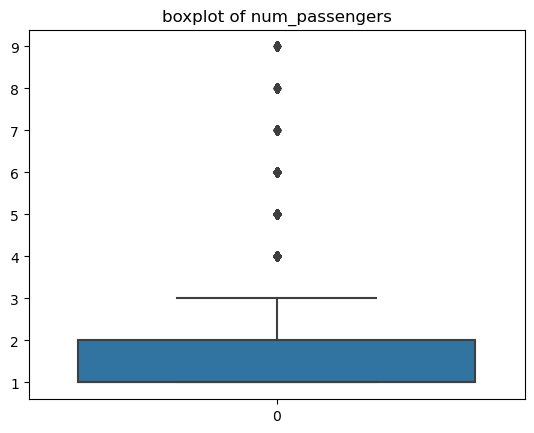

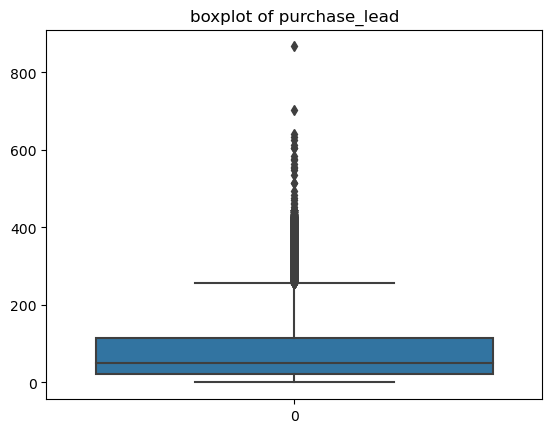

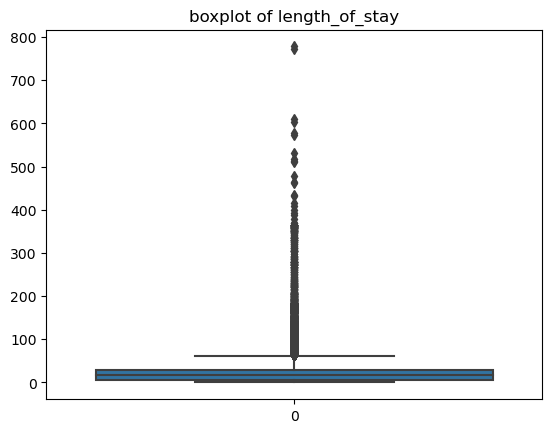

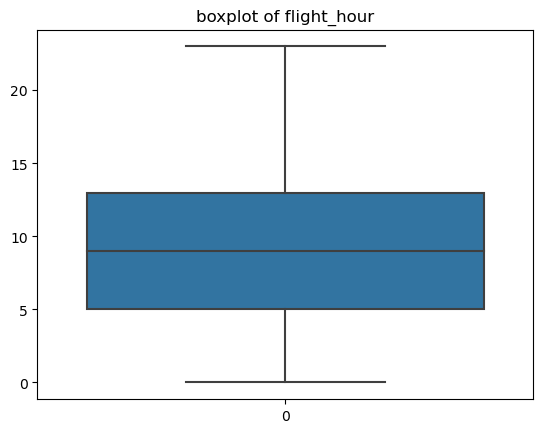

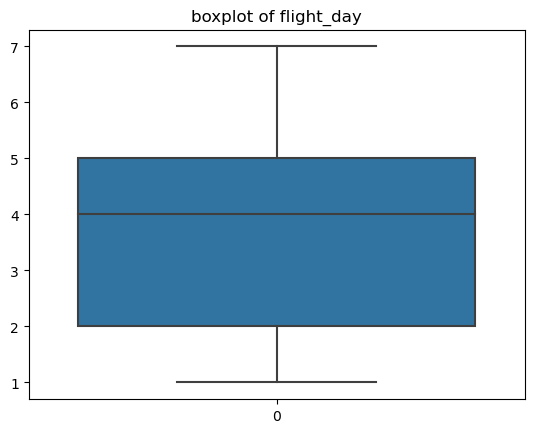

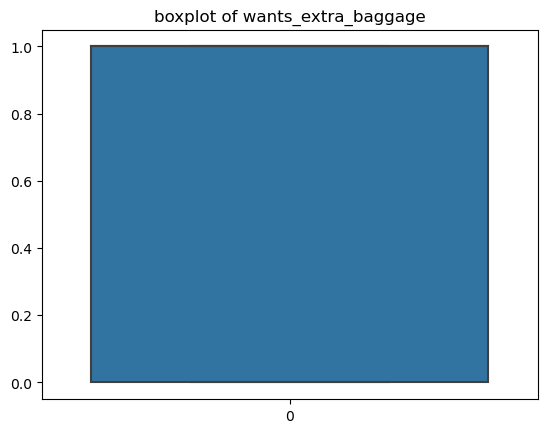

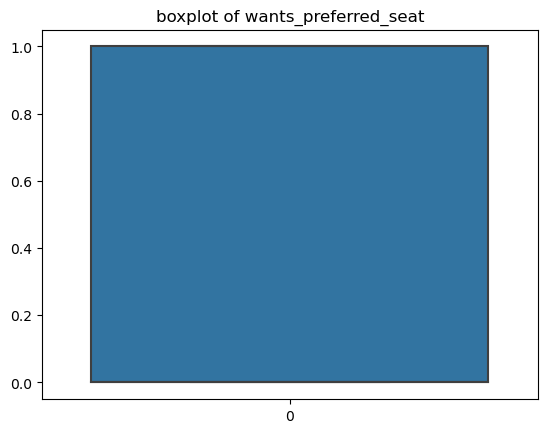

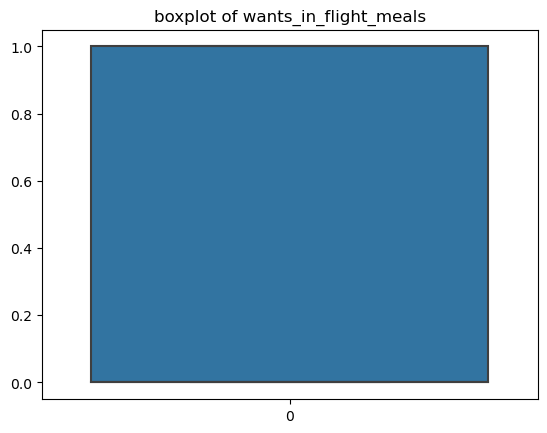

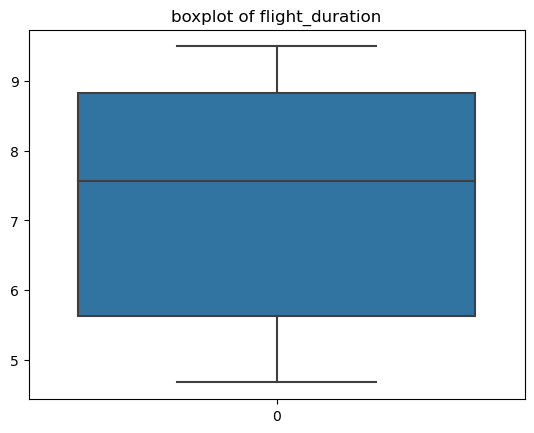

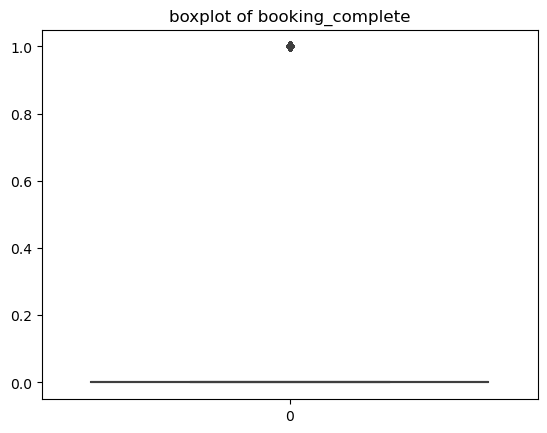

In [9]:
#boxplot to see outliers
for i in df.select_dtypes(include=['int','float']):
    plt.figure()
    sns.boxplot(df[i])
    plt.title(f'boxplot of {i}')

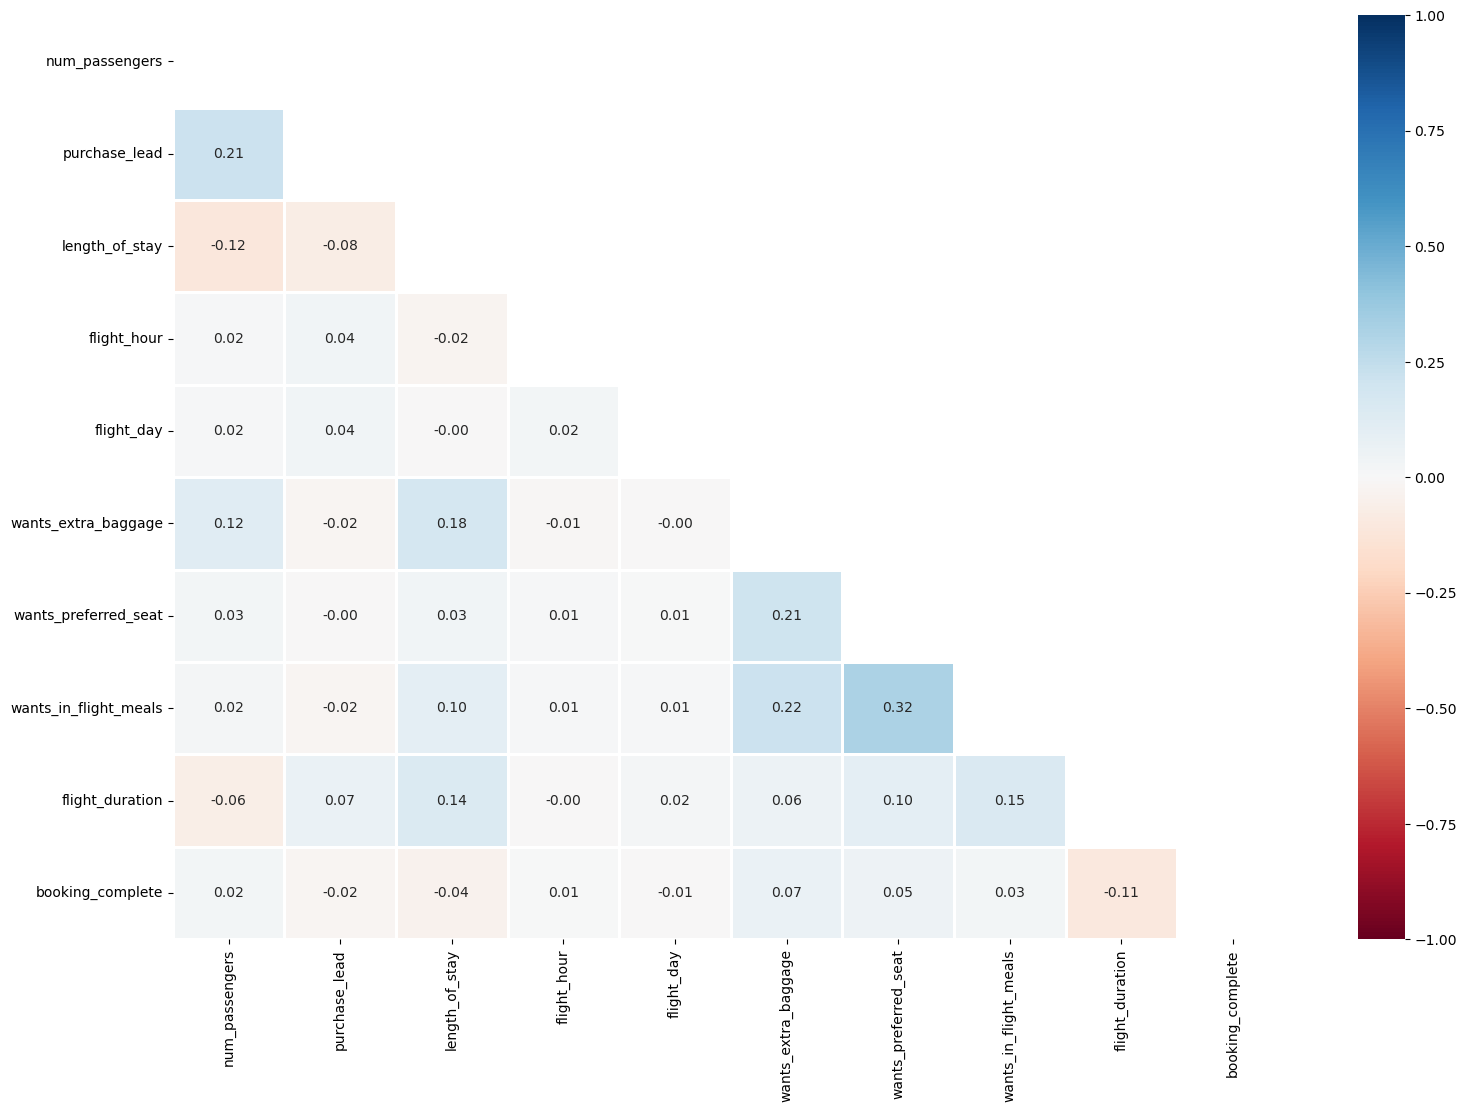

In [10]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(18,12))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(), mask = mask, center=0, cmap ="RdBu", linewidths=1, annot=True, fmt=".2f", vmin=-1, vmax=1)
plt.show()

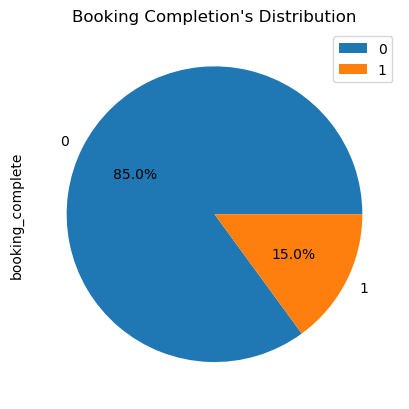

In [11]:
df["booking_complete"].value_counts().plot.pie(autopct='%1.1f%%')
plt.title("Booking Completion's Distribution")
plt.legend()
plt.savefig('book.png')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


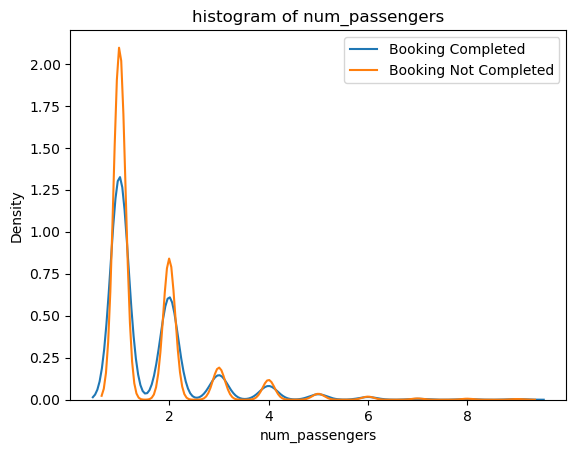

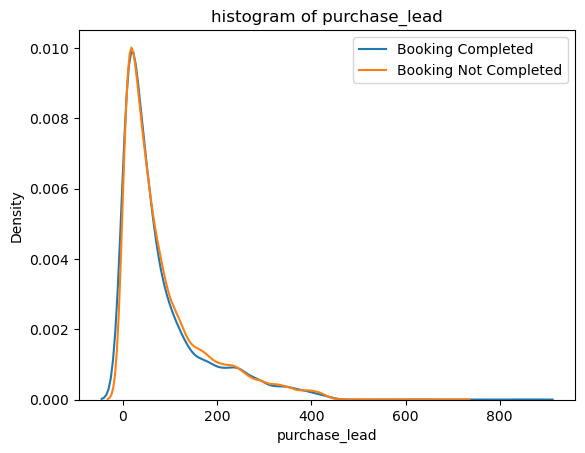

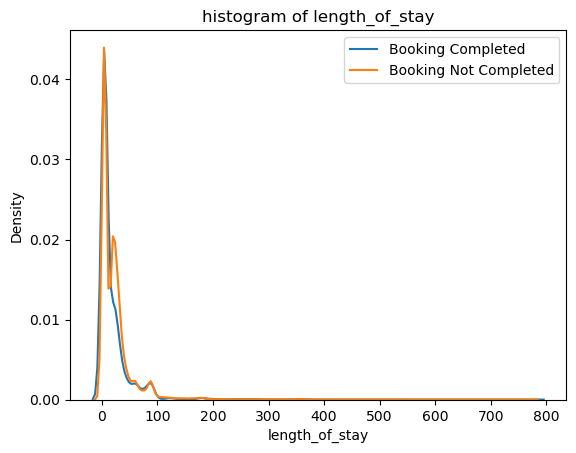

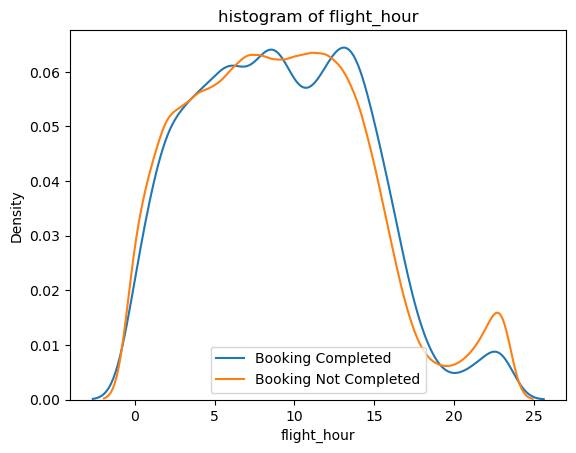

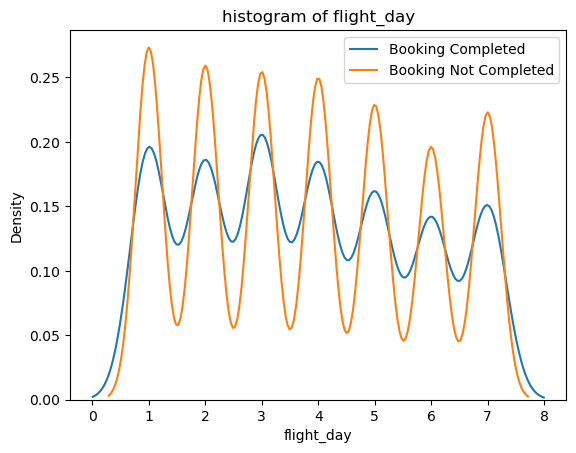

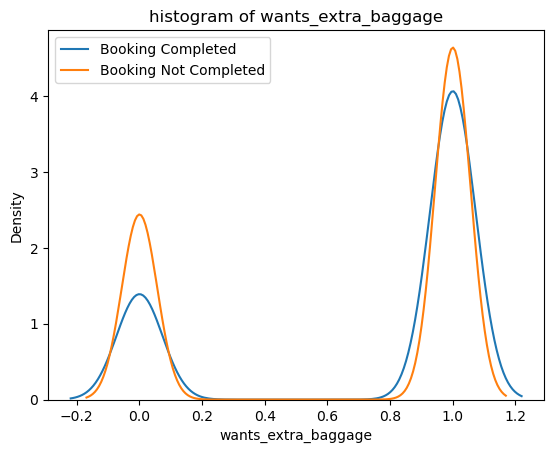

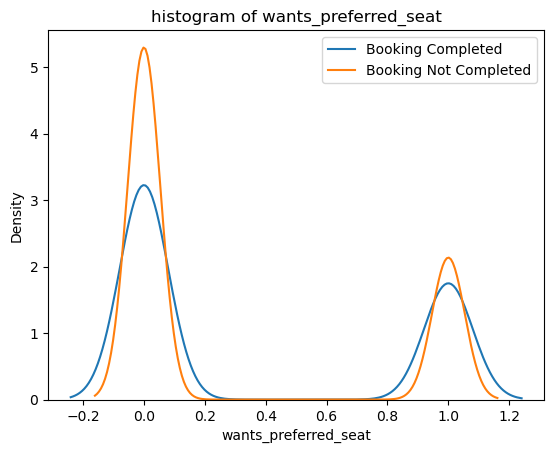

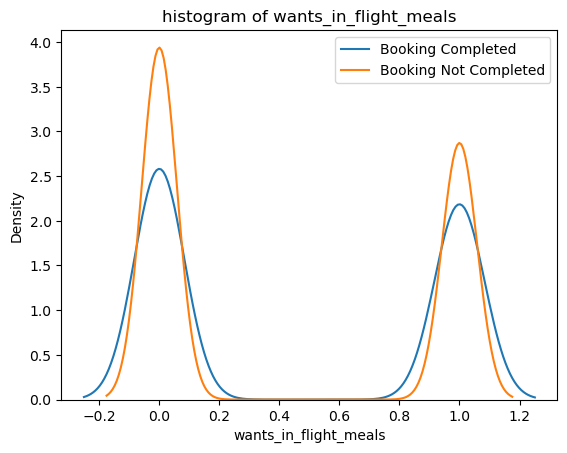

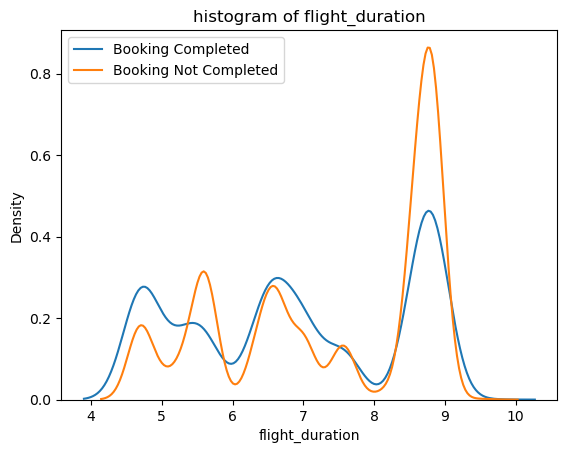

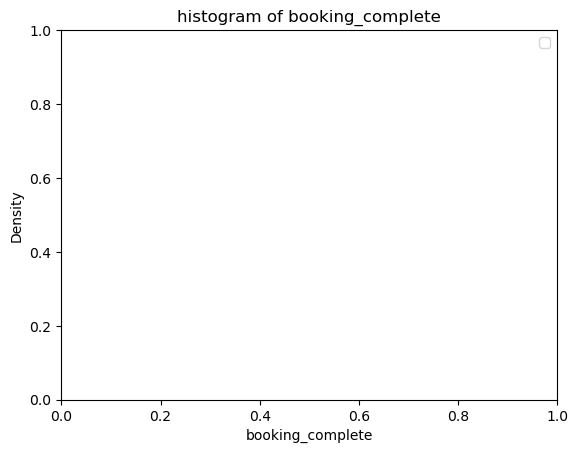

In [12]:
complete = df[df['booking_complete'] == 1]
not_complete = df[df['booking_complete'] == 0]
for h in df.select_dtypes(include=['int','float']):
        plt.figure()
        sns.kdeplot(complete[h], label='Booking Completed')
        sns.kdeplot(not_complete[h], label='Booking Not Completed')
        plt.title(f'histogram of {h}')
        plt.legend()


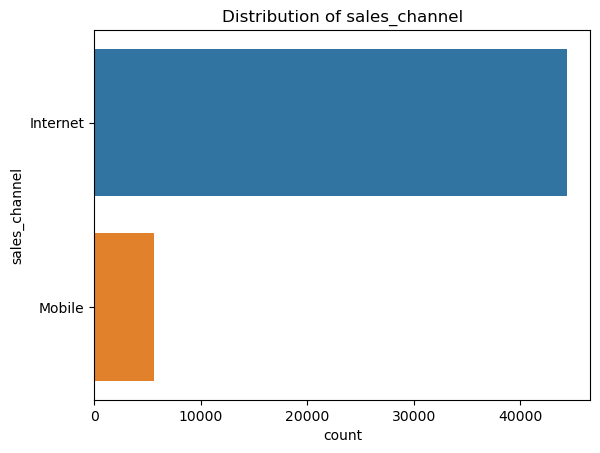

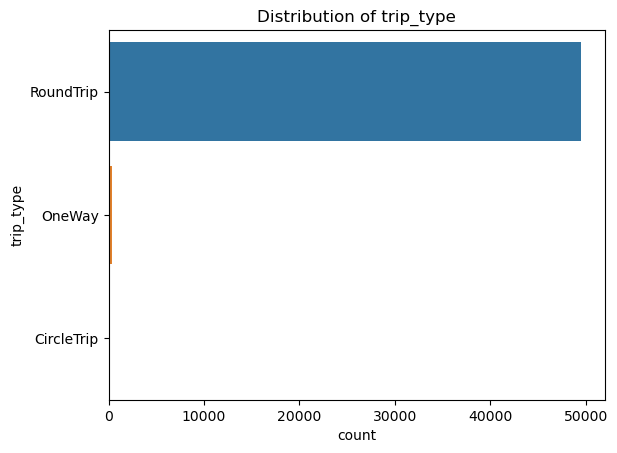

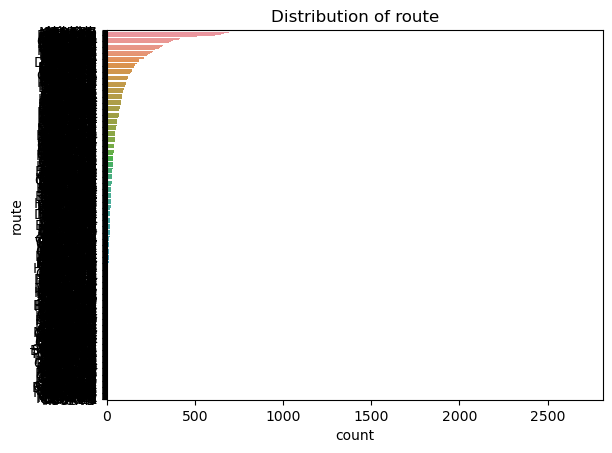

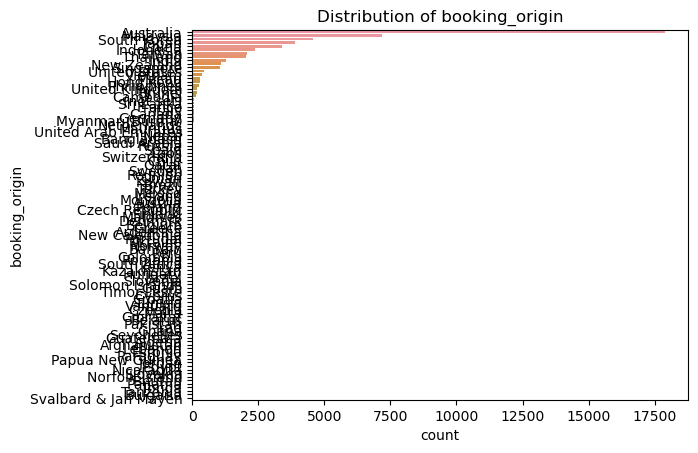

In [13]:
for cat in df.select_dtypes(include='object'):
    plt.figure()
    cat_count = df[cat].value_counts()
    cat_sort = cat_count.index
    sns.countplot(data = df, y=cat, order=cat_sort)
    plt.title(f"Distribution of {cat}")

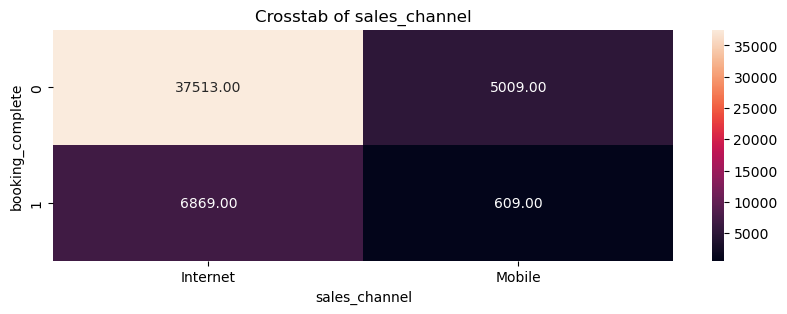

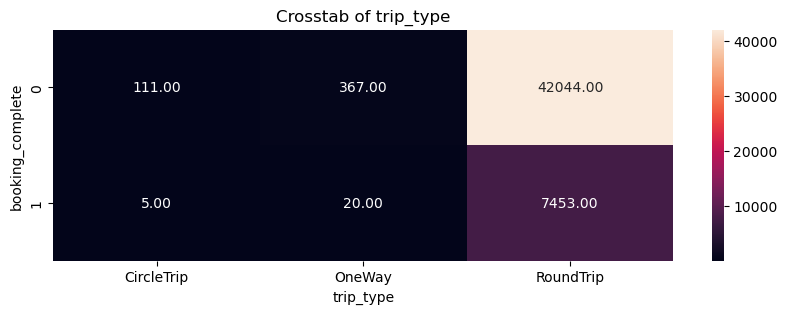

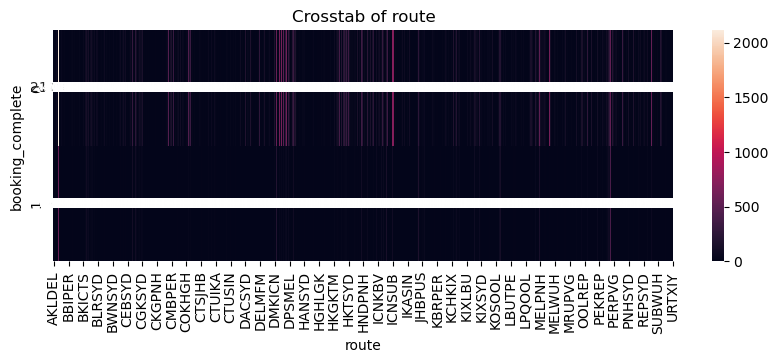

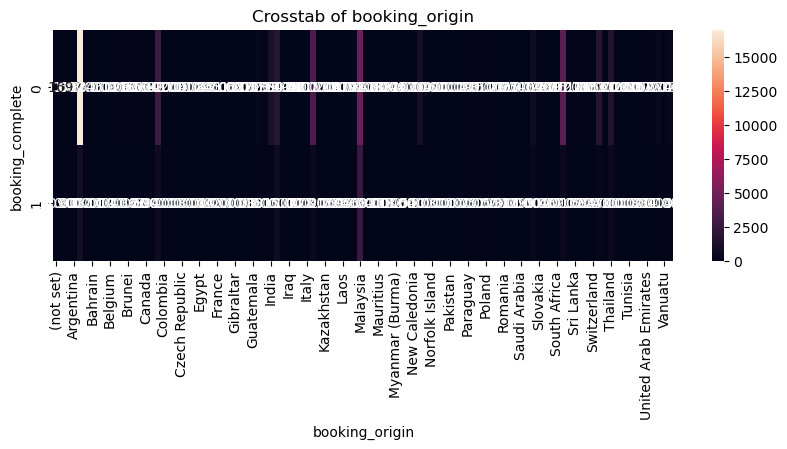

In [14]:
#Relationship between Target and categorical variables
for ct in df.select_dtypes(include='object'):
    plt.figure(figsize=(10,3))
    sns.heatmap(pd.crosstab(df['booking_complete'],df[ct]), annot=True, fmt=".2f")
    plt.title(f'Crosstab of {ct}')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  int64  
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(9), object(4)
memory usage: 5.3+ 

In [16]:
df['sales_channel'] = df['sales_channel'].astype('category')
df['trip_type'] = df['trip_type'].astype('category') 
df['route'] = df['route'].astype('category')
df['booking_origin'] = df['booking_origin'].astype('category')

In [17]:
#impute outliers:
from scipy.stats.mstats import winsorize
for o in ['num_passengers','purchase_lead','length_of_stay']:
    df[o] = winsorize(df[o], limits=[0.05, 0.05])
#     df[o] = np.log10(df[o] + 1)

In [18]:
import category_encoders as ce
for c in ['sales_channel','trip_type','route','booking_origin']:
    cat_encoded = ce.BinaryEncoder(cols = [c])
    df = cat_encoded.fit_transform(df)

In [19]:
from sklearn.utils import resample
majority = df[df['booking_complete']==0]
minority = df[df['booking_complete']==1]

minority_upsampled = resample(minority, replace=True, n_samples=len(majority), random_state=123)
df_upsampled = pd.concat([majority, minority_upsampled])

In [20]:
X=df_upsampled.drop("booking_complete", axis=1)
y=df_upsampled['booking_complete']

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=123)

In [22]:
model =RandomForestClassifier()
model.fit(xtrain,ytrain)
y_pred = model.predict(xtest)
print(classification_report(ytest, y_pred))
print(confusion_matrix(ytest, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.92      0.96      8584
           1       0.93      0.99      0.96      8425

    accuracy                           0.96     17009
   macro avg       0.96      0.96      0.96     17009
weighted avg       0.96      0.96      0.96     17009

[[7911  673]
 [  60 8365]]


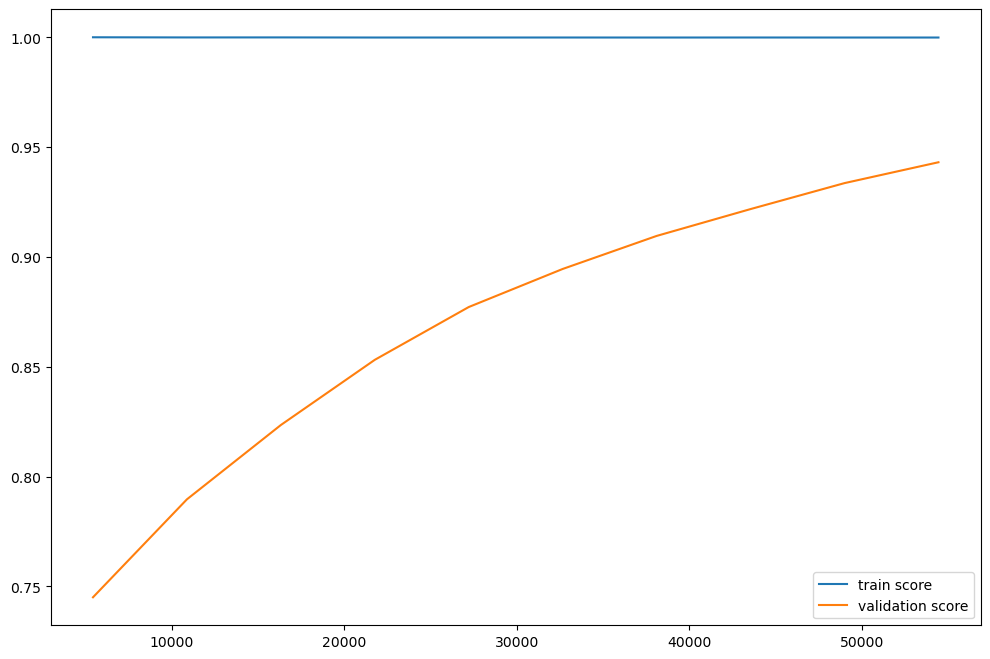

In [23]:
    N, train_score, val_score = learning_curve(model, xtrain,ytrain,cv=5, scoring="accuracy", train_sizes=np.linspace(0.1,1,10))
    plt.figure(figsize=(12,8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()

                  feature  importance
5           purchase_lead    0.150497
7             flight_hour    0.122374
6          length_of_stay    0.114047
8              flight_day    0.083978
29        flight_duration    0.064039
20       booking_origin_1    0.058081
24       booking_origin_5    0.042192
0          num_passengers    0.041059
25       booking_origin_6    0.026174
28  wants_in_flight_meals    0.022803
27   wants_preferred_seat    0.020541
18                route_9    0.020497
15                route_6    0.020454
17                route_8    0.020225
26    wants_extra_baggage    0.020130
13                route_4    0.020064
16                route_7    0.019970
14                route_5    0.018275
22       booking_origin_3    0.016587
11                route_2    0.016238
12                route_3    0.016162
10                route_1    0.015254
9                 route_0    0.013303
23       booking_origin_4    0.012602
1         sales_channel_0    0.008323
2         sa

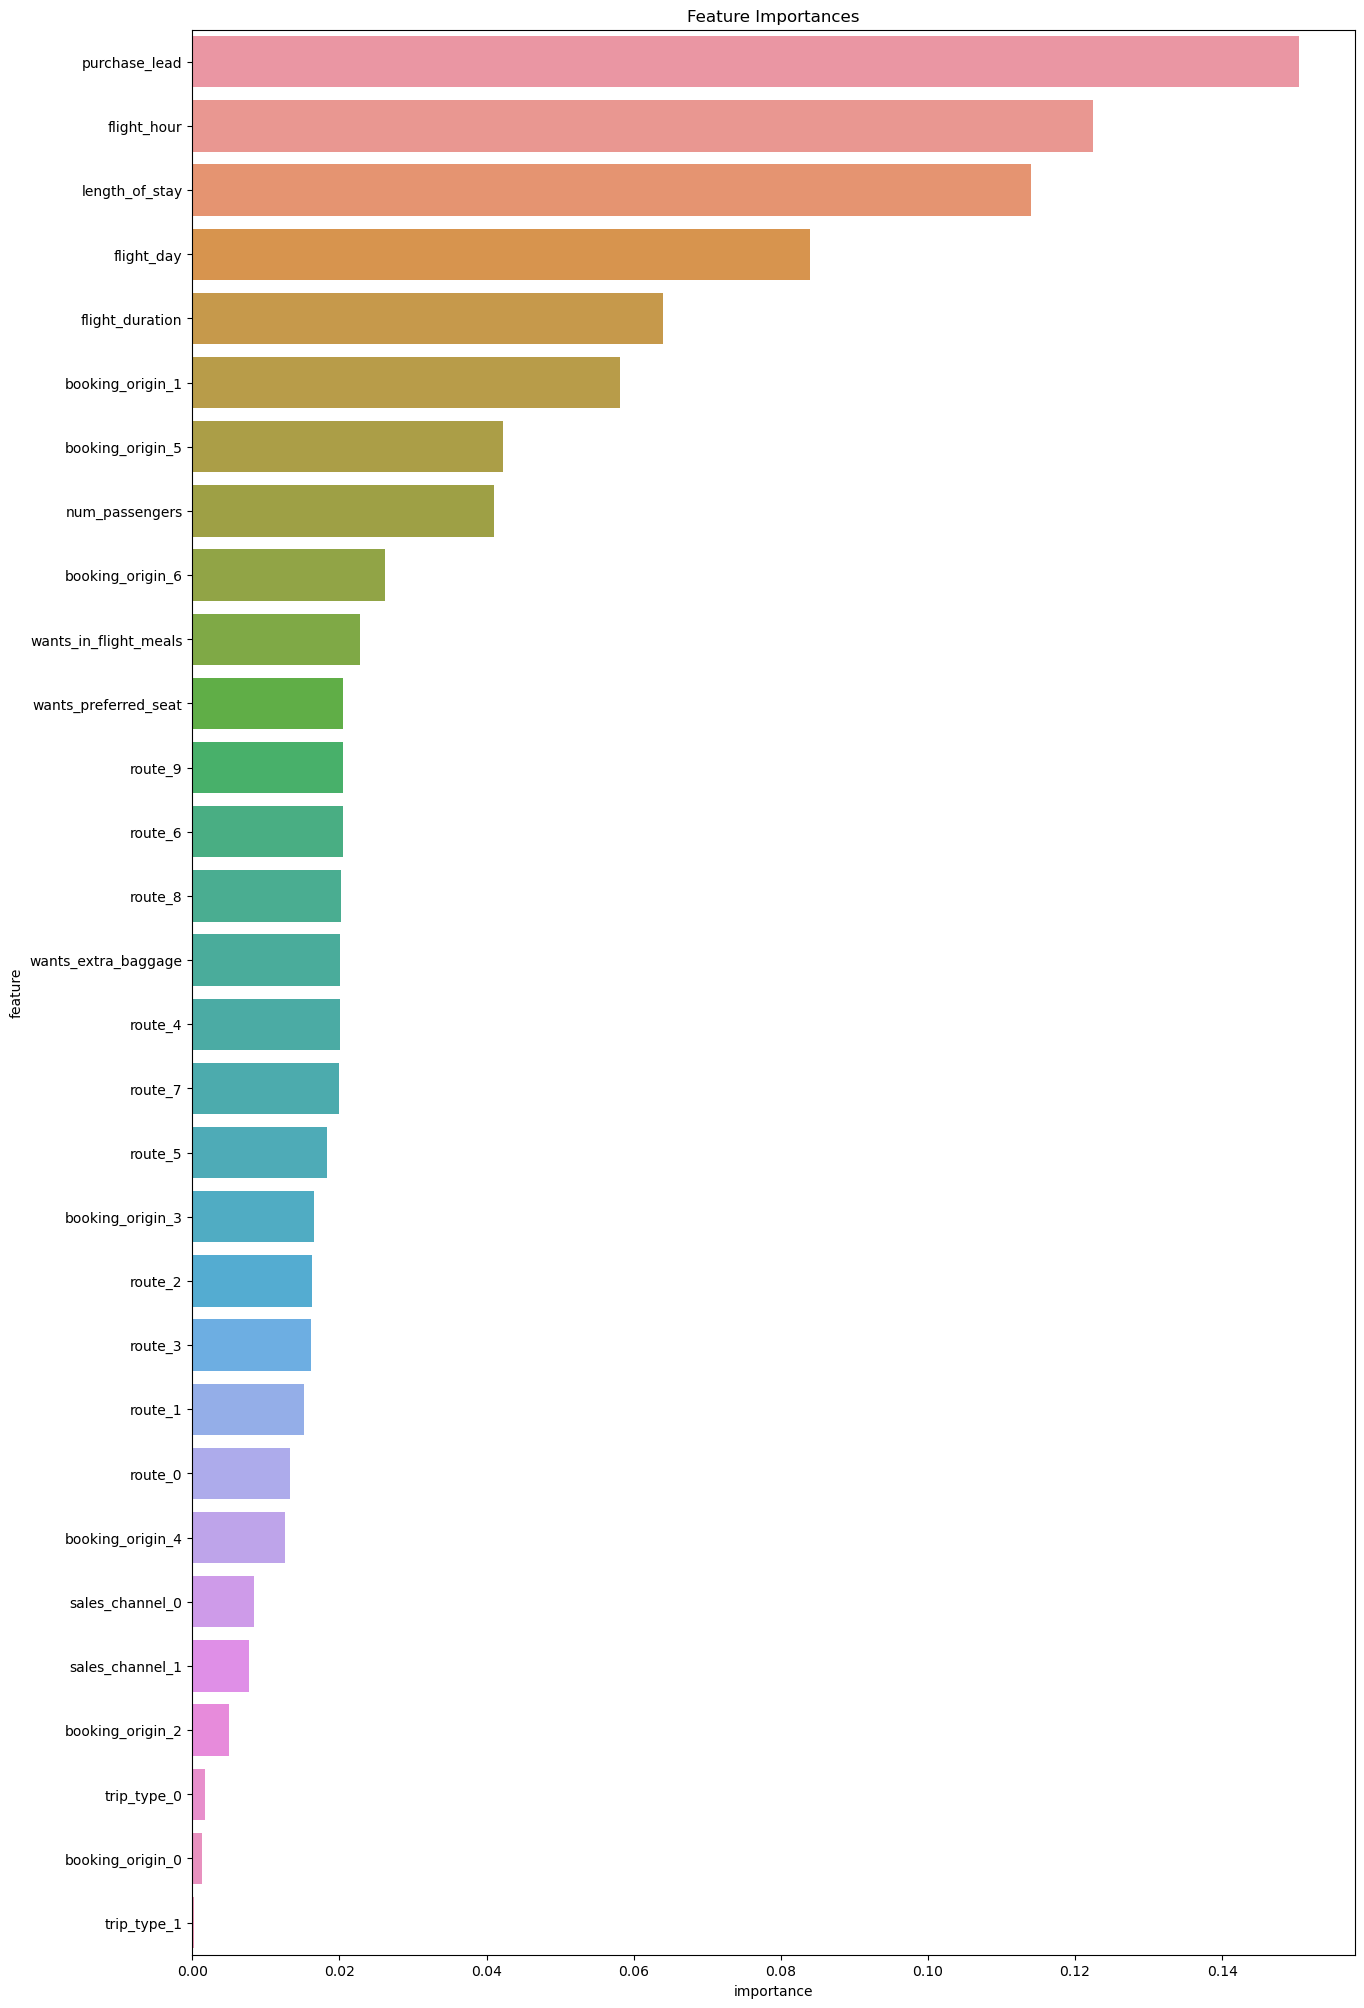

In [24]:
#feature importance
importances = model.feature_importances_

# Create a DataFrame for better visualization
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': importances})
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

# Print feature importances
print(feature_importances)

# Plot feature importances
plt.figure(figsize=(15, 25))
sns.barplot(x='importance', y='feature', data=feature_importances)
plt.title('Feature Importances')
plt.savefig('feature_importance.png')
plt.show()

In [25]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score

In [26]:
def evaluate(y_test, y_pred):
    """
    Performs evaluation comparison on y_test labels vs y_pred labels.
    """
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    metric_dictionnary = {
        "accuracy":round(accuracy,2),
        "precision":round(precision,2),
        "recall":round(recall,2),
        "F1": round(f1,2)
    }
    print(f"Acc:{accuracy * 100:.2f}%")
    print(f"Precision:{precision * 100:.2f}%")
    print(f"Recall:{recall * 100:.2f}%")
    print(f"f1:{f1 * 100:.2f}%")
    return metric_dictionnary

In [27]:
model_performance = evaluate(ytest, y_pred)

Acc:95.69%
Precision:92.55%
Recall:99.29%
f1:95.80%


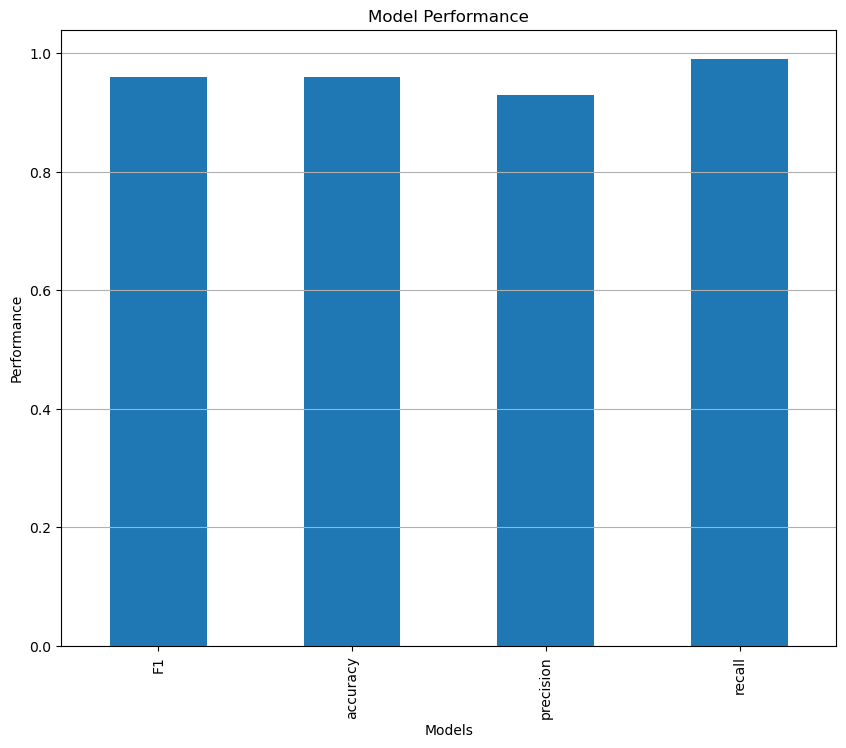

In [28]:
performance_plot =pd.DataFrame({" Model": model_performance})
# Plot the bar chart
ax = performance_plot.plot(kind='bar', figsize=(10, 8), legend=False)

# Customize the plot
ax.set_title('Model Performance')
ax.set_xlabel('Models')
ax.set_ylabel('Performance')
ax.grid(axis='y')
plt.savefig('performance.png')
plt.show()